In [1]:
# importing the dependencies
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

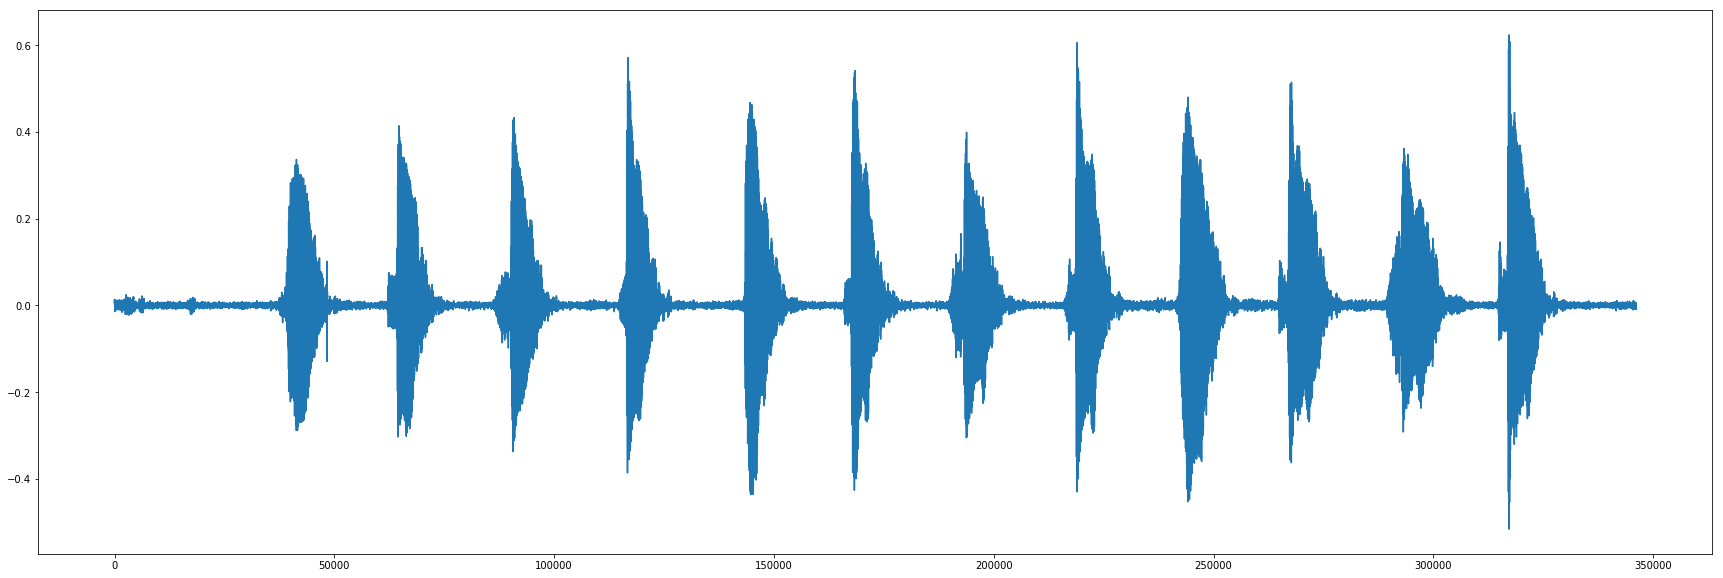

In [2]:
# load the audio and visualize it
file_path = '/Users/path/to/file.m4a'
y, sr = librosa.load(file_path)
y = librosa.core.to_mono(y)
# plot
plt.figure(figsize = (30, 10))
plt.plot(y)

In [106]:
# STEP 1: BREAK INTO SEGMENTS
seglen = 40 # ms
num_segments = int((len(y) * 1000) / (sr * seglen))
segsamples = int(sr*seglen / 1000)
segments = []
for i in range(num_segments):
    seg = y[i*segsamples: (i+1)*segsamples]
    segments.append(seg)

In [107]:
# STEP 2: CRUDE ACTIVITY DETECTION
def crude_ad(x, threshold = -35):
    '''
    return True if the median value in the array is above a certain threshold
    '''
    log_val = 10 * np.log10(x ** 2)
    if np.max(log_val) >= threshold:
        return True
    return False

# performing the crude_ad
segments_ad = []
for i,seg in enumerate(segments):
    try:
        segments_ad.append(crude_ad(seg))
    except:
        print(i)

In [149]:
seg_true = [i for i,act in enumerate(segments_ad) if act == True]
seg_true_indices = [[i*segsamples, (i+1)*segsamples] for i in seg_true]

In [139]:
print(num_segments)
print(len(segments))
print(seg_true_indices[-1][1])
print(seg_true_indices[0])

392
392
328104
[1764, 2646]


In [128]:
seg_true_indices[-1]

[327222, 328104]

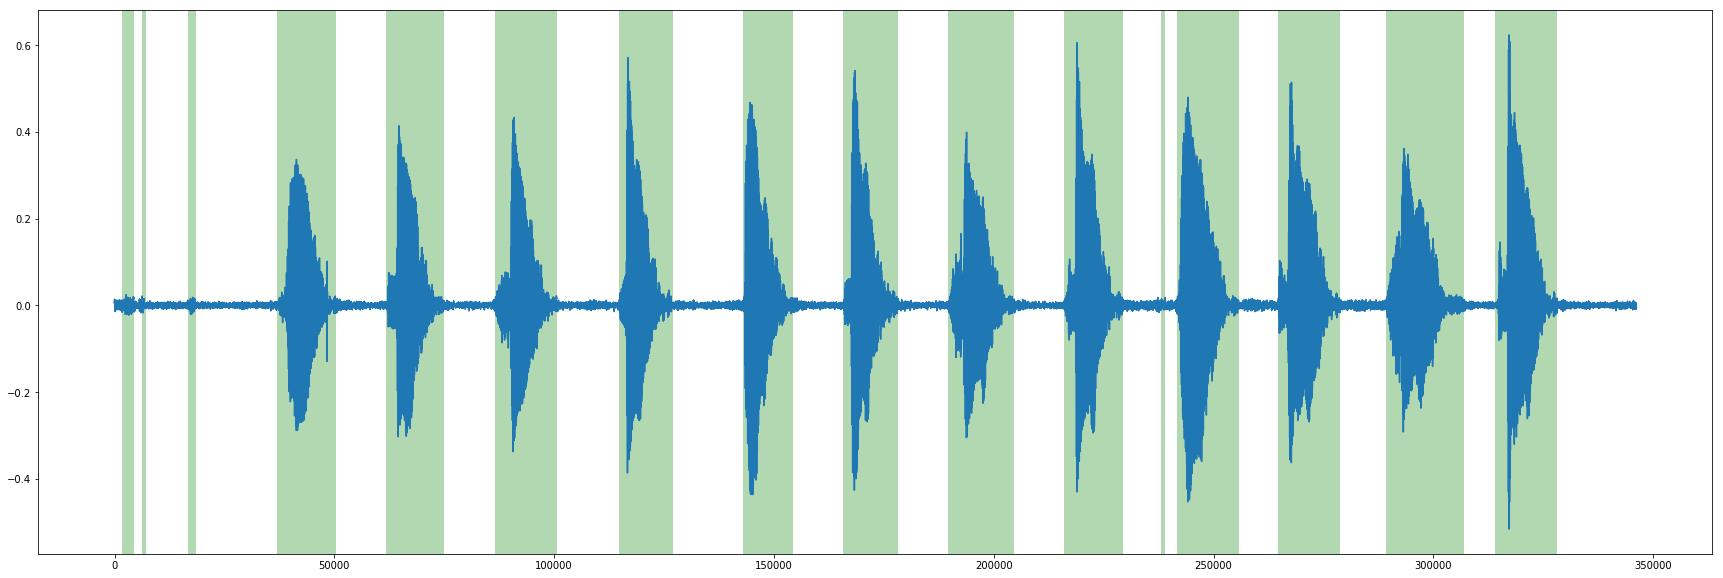

In [110]:
# first overlaping a single frame to see length
plt.figure(figsize = (30, 10))
plt.plot(y)
for i in seg_true_indices:
    plt.axvspan(i[0], i[1], facecolor = 'g', alpha = 0.3)

In [165]:
# STEP 3: GET BLOCKS
segments_ = []
start = seg_true_indices[0][0]
for i in range(len(seg_true_indices) - 1):
    if seg_true_indices[i][1] == seg_true_indices[i+1][0]:
        end = seg_true_indices[i+1][1]
    else:
        segments_.append([start, end])
        start = seg_true_indices[i+1][0]
segments_.append([start, end])

In [ ]:
blocks = []
for p in segments_:
    blocks.append(y[p[0]:p[1]+1])
print(len_blocks)